**2.Load an mp3 file into the colab notebook.**

In [12]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [14]:
import librosa

demo_mp3, sr = librosa.load('/content/demo1.mp3',sr = None )


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


**3.Plot the waveform of the audio in the notebook.**

The simplingrate of this file is: 44100


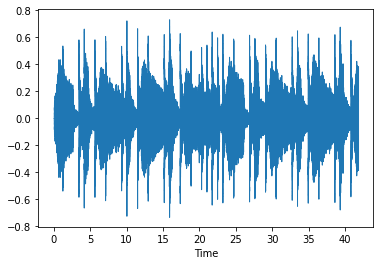

In [15]:
import librosa.display

librosa.display.waveshow(demo_mp3)
print('The simplingrate of this file is:',sr)

**4. Plot a stft spectrogram of the audio file.**

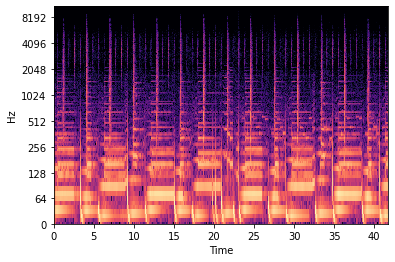

In [16]:
import matplotlib.pyplot as plt
import numpy as np

demo_stft = librosa.stft(demo_mp3, n_fft= 2048)
D = librosa.amplitude_to_db(np.abs(demo_stft), ref = np.max)
librosa.display.specshow(D, y_axis = 'log', x_axis= 'time')

**5.Plot a melspectrogram of the audio file.**

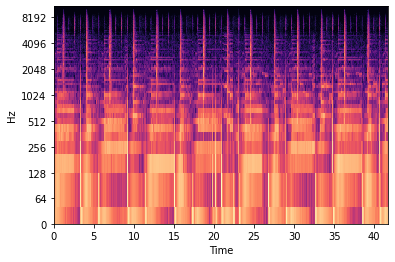

In [17]:
S = librosa.feature.melspectrogram(y = None, S = D)
librosa.display.specshow(S, y_axis = 'log', x_axis= 'time')


**6.Compute the duration in seconds of the audio file.**

In [20]:
demo_duration = librosa.core.get_duration(demo_mp3)
print("the duration of the audio file is:" , demo_duration/2 , "s")

the duration of the audio file is: 20.88596371882086 s


**7.Playback the audio file so we can listen to it in the notebook.**

In [21]:
import IPython.display as ipd

ipd.Audio('/content/demo1.mp3')

**8.Create a low pass filter with a cut frequency of 2kHz and attenuation of 60 dB in the stop band and a maximum passband ripple of 1dB. (you can use any kind of filter, design technique or algorithm you want).**

In [22]:
import scipy.signal as sig

#fs = 44100Hz Nyquist = 22050Hz
cutoff = 2000
gap = 200
numtaps =400

lp = sig.remez(numtaps, [0,cutoff-gap,cutoff,sr/2], weight = [1,100], desired= [1,0], fs = sr)




**9.Plot the filter frequency response. (magnitude and phase).**

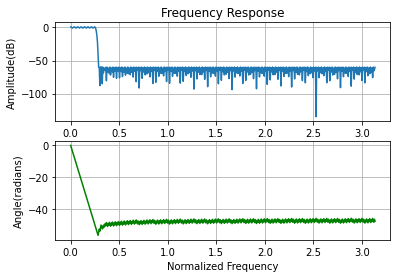

In [23]:
w , h = sig.freqz(lp)

plt.subplot(2,1,1)
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Frequency Response')
plt.ylabel('Amplitude(dB)')
plt.grid(True)

plt.subplot(2,1,2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles, 'g')
plt.ylabel('Angle(radians)')
plt.xlabel('Normalized Frequency')
plt.grid(True)


**10.Plot the filter impulse response.**

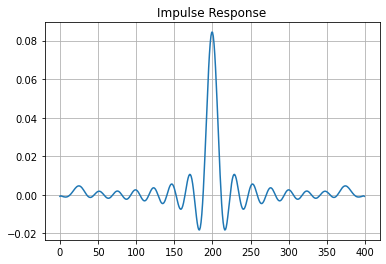

In [24]:
plt.plot(lp)
plt.title('Impulse Response')
plt.grid(True)

**11.Filter the audio file using the designed filter.**

In [25]:
filtered = sig.lfilter(lp,[1],x = demo_mp3)

**12.Playback the filtered signal so we can listen to it in the notebook.**

In [26]:
ipd.Audio(data = filtered, rate = sr)

Output hidden; open in https://colab.research.google.com to view.

**13.Plot the stft spectrogram of the filtered signal.**

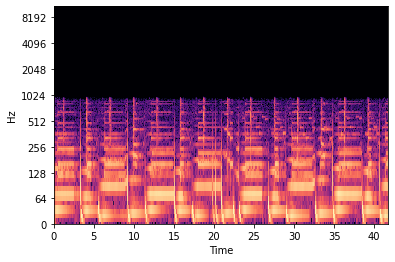

In [27]:
filtered_stft = librosa.stft(filtered, n_fft= 2048)
D = librosa.amplitude_to_db(np.abs(filtered_stft), ref = np.max)
librosa.display.specshow(D, y_axis = 'log', x_axis= 'time')

**14.Save the filter parameters in a file so they can be shared.**

In [28]:
np.save('filter parameters', lp)

**15.Save the filtered audio signal as a numpy array in a file.**

In [29]:
np.save('filtered_audio_signal', filtered)